# **Load Libraries**

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorboard
from tensorflow import keras
from pandas import read_csv

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


To ensure we get reproducible results (on your local machine) we set the random seed for Python, Numpy and TensorFlow. This will ensure the SAME random initialization of weight matrices each tiem you execute your code. In Colab, results might not be reproducable.

In [ ]:
seed=1234
import os
os.environ['PYTHONHASHSEED'] = str(seed)
# For working on GPUs from "TensorFlow Determinism"
os.environ['CUDA_VISBLE_DEVICE'] = ''
import numpy as np
np.random.seed(seed)
import random
random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)


# **Import Data**

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Info**

https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

1. Sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window).

2. Three types of data across X, Y, and Z axis: total acceleration, body acceleration, and body gyroscope

 ==> Total 9 features per timestamp



In [ ]:
## dstack operation in numpy
## Stack arrays in sequence depth wise (along third axis).
## https://numpy.org/doc/stable/reference/generated/numpy.dstack.html

a = np.array((1,2,3))
b = np.array((2,3,4))
np.dstack((a,b))


array([[[1, 2],
        [2, 3],
        [3, 4]]])

In [ ]:
## code adapted https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/

def load_file(filepath):
 dataframe = read_csv(filepath, header=None, delim_whitespace=True)
 return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
 loaded = list()
 for name in filenames:
   filepath = prefix + name
   data = load_file(prefix + name)
   loaded.append(data)
 # stack group so that features are the 3rd dimension
 loaded = np.dstack(loaded)
 return loaded

In [ ]:

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
 filepath = prefix + group + '/Inertial Signals/'
 # load all 9 files as a single array
 filenames = list()
 # total acceleration
 filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
 # body acceleration
 filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
 # body gyroscope
 filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
 # load input data
 X = load_group(filenames, filepath)
 # load class output
 y = load_file(prefix + group + '/y_'+group+'.txt')
 return X, y

In [ ]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
 # load all train
 path = '/Your filepath/'
 trainX, trainy = load_dataset_group('train', prefix + path)
 print(trainX.shape, trainy.shape)
 # load all test
 testX, testy = load_dataset_group('test', prefix +path)
 print(testX.shape, testy.shape)
 # zero-offset class values
 trainy = trainy - 1
 testy = testy - 1
 print("Train X, Y and Test X, Y shapes", trainX.shape, trainy.shape, testX.shape, testy.shape)
 return trainX, trainy, testX, testy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM


def my_model(n_timesteps,n_features, n_outputs):

  model = Sequential()
  model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  print(model.summary())

  return model


In [ ]:
# load data
all_trainX, all_trainy, testX, testy = load_dataset()

trainX, valX, trainy, valy = train_test_split(all_trainX, all_trainy, test_size=0.2, random_state=32)

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 6




<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50c

(7352, 128, 9) (7352, 1)


<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50cbb3008429>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
<ipython-input-8-50c

(2947, 128, 9) (2947, 1)
Train X, Y and Test X, Y shapes (7352, 128, 9) (7352, 1) (2947, 128, 9) (2947, 1)


In [ ]:
LSTM_model = my_model(n_timesteps, n_features, n_outputs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          44,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,706 (213.70 KB)

 Trainable params: 54,706 (213.70 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
## With Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

### captures the training and validation loss in each epoch. This will be used to plot and visualize
history = LSTM_model.fit(trainX, trainy, validation_data=(valX, valy), batch_size= 128, epochs= 15, callbacks=[tensorboard_callback, es_callback])

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.7532 - loss: 0.5773 - val_accuracy: 0.7920 - val_loss: 0.5273
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 305ms/step - accuracy: 0.7939 - loss: 0.5857 - val_accuracy: 0.7308 - val_loss: 0.6923
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.7520 - loss: 0.6030 - val_accuracy: 0.8688 - val_loss: 0.3904
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 411ms/step - accuracy: 0.8529 - loss: 0.4062 - val_accuracy: 0.9137 - val_loss: 0.2616
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - accuracy: 0.9035 - loss: 0.3043 - val_accuracy: 0.9341 - val_loss: 0.2010
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 382ms/step - accuracy: 0.9110 - loss: 0.2522 - val_accuracy: 0.9429 - val_loss: 0.1787
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - accuracy: 0.9351 - loss: 0.1939 - val_accuracy: 0.9449 - val_loss: 0.1743
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - accuracy: 0.9387 - loss: 0.1902 - val_accu

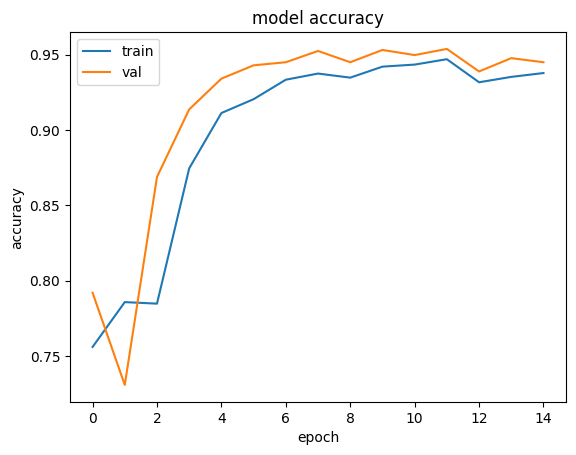

In [ ]:
#Plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn import metrics
# Evaluate
score = LSTM_model.evaluate(testX, testy)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8653 - loss: 0.3179
Test loss: 0.26115694642066956
Test accuracy: 0.9009161591529846
